In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
import tensorflow as tf

In [113]:
df = pd.read_csv("data.csv")
df = df.rename(columns={"tension_strenght": "tensile_strength"})
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tensile_strength,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tensile_strength    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


In [115]:
for column in df.columns:
    print(str(column)+": "+str(df[column].unique()))
    print()

layer_height: [0.02 0.06 0.1  0.15 0.2 ]

wall_thickness: [ 8  7  1  4  6 10  5  9  2  3]

infill_density: [90 80 70 40 10 20 50 30 60]

infill_pattern: ['grid' 'honeycomb']

nozzle_temperature: [220 225 230 240 250 200 205 210 215]

bed_temperature: [60 65 70 75 80]

print_speed: [ 40  60 120]

material: ['abs' 'pla']

fan_speed: [  0  25  50  75 100]

roughness: [ 25  32  40  68  92  60  55  21  24  30  75 118 200 220 126 145  88  74
 120 144 265 312 368 180 176 128 138 121 168 154 225 289 326 192 212 172
 163 276 298 360 357 321 278 244]

tensile_strength: [18 16  8 10  5 24 12 14 27 25 37  9 23 26 33 29 19 11 34 13 22  4 35 28
 21 30]

elongation: [1.2 1.4 0.8 0.5 0.7 1.1 1.3 1.5 1.7 2.4 1.  2.2 1.9 1.6 2.1 2.  0.9 0.4
 1.8 2.9 0.6 2.8 2.3 3.3 3.1 2.7 3.2]



In [116]:
#In this data set, ABS and PLA assigned 0 and 1 values for materials (abs = 0, pla = 1)
df.material = [0 if each=='abs' else 1 for each in df.material]

#In this data set, grid and honeycomb assigned 0 and 1 values for infill_pattern (grid = 0, honeycomb = 1)
df.infill_pattern = [0 if each=='grid' else 1 for each in df.infill_pattern]

df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tensile_strength,elongation
0,0.02,8,90,0,220,60,40,0,0,25,18,1.2
1,0.02,7,90,1,225,65,40,0,25,32,16,1.4
2,0.02,1,80,0,230,70,40,0,50,40,8,0.8
3,0.02,4,70,1,240,75,40,0,75,68,10,0.5
4,0.02,6,90,0,250,80,40,0,100,92,5,0.7


In [117]:
df.layer_height = df.layer_height*100
df.elongation = df.elongation*100

In [118]:
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tensile_strength,elongation
0,2.0,8,90,0,220,60,40,0,0,25,18,120.0
1,2.0,7,90,1,225,65,40,0,25,32,16,140.0
2,2.0,1,80,0,230,70,40,0,50,40,8,80.0
3,2.0,4,70,1,240,75,40,0,75,68,10,50.0
4,2.0,6,90,0,250,80,40,0,100,92,5,70.0


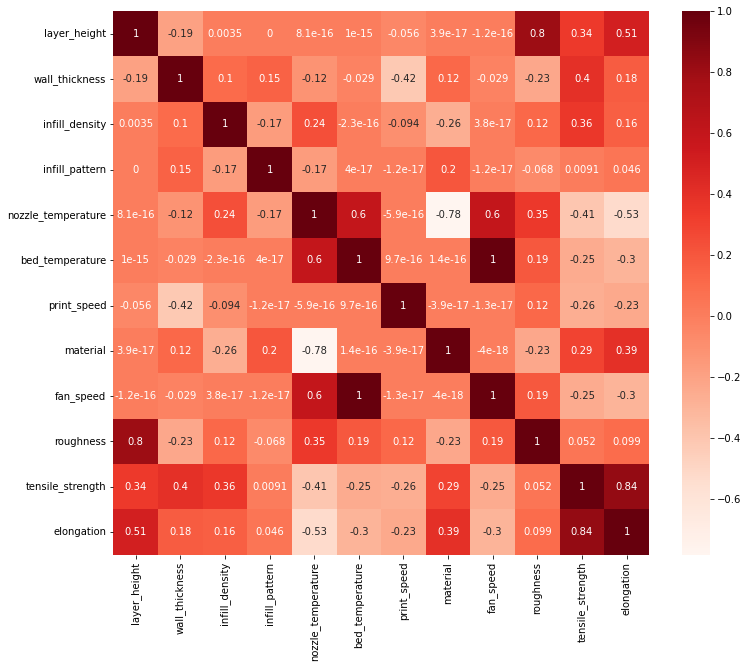

In [119]:
import seaborn as sns
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds) #Using Pearson Correlation
plt.show()

In [121]:
drop_input_cols = ['infill_pattern', 'material']
dfn=df.drop(drop_input_cols, axis=1)
dfn.head()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tensile_strength,elongation
0,2.0,8,90,220,60,40,0,25,18,120.0
1,2.0,7,90,225,65,40,25,32,16,140.0
2,2.0,1,80,230,70,40,50,40,8,80.0
3,2.0,4,70,240,75,40,75,68,10,50.0
4,2.0,6,90,250,80,40,100,92,5,70.0


In [105]:
target_cols = ['tensile_strength', 'roughness', 'elongation']
Y = df[target_cols].values
drop_cols = ['tensile_strength', 'roughness', 'elongation', 'infill_pattern', 'material']
X = df.drop(drop_cols,axis=1).values

In [106]:
## Construct a NN model using functional API
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, Dropout, Activation, Flatten

inputvec = Input( shape=(7,) )
x = Dense( 16, activation='relu' )(inputvec)
x = Dense( 32, activation='relu' )(x)
x = Dense( 64, activation='relu' )(x)
#x = Dropout(0.5)(x)
x = Dense( 32, activation='relu' )(x)
x = Dense( 16, activation='relu' )(x)
x = Dense( 8, activation='relu' )(x)
#x = Dropout(0.25)(x)
preds = Dense(3, activation='linear' )(x)

model = Model(name= 'NN_model_2_1', inputs = inputvec,outputs=preds)
model.summary()

Model: "NN_model_2_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense_34 (Dense)            (None, 16)                128       
                                                                 
 dense_35 (Dense)            (None, 32)                544       
                                                                 
 dense_36 (Dense)            (None, 64)                2112      
                                                                 
 dense_37 (Dense)            (None, 32)                2080      
                                                                 
 dense_38 (Dense)            (None, 16)                528       
                                                                 
 dense_39 (Dense)            (None, 8)                

In [107]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

Fold 1
Epoch 1/100
9/9 [==============================] - 2s 17ms/step - loss: 23767.7695 - accuracy: 0.4222 - val_loss: 30716.4570 - val_accuracy: 0.4000
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 22518.6191 - accuracy: 0.0667 - val_loss: 29185.7285 - val_accuracy: 0.2000
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 21222.8320 - accuracy: 0.0444 - val_loss: 27438.2070 - val_accuracy: 0.4000
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 19076.6465 - accuracy: 0.3556 - val_loss: 24639.0742 - val_accuracy: 0.4000
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 16067.8779 - accuracy: 0.4222 - val_loss: 21135.2344 - val_accuracy: 0.4000
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 13550.3916 - accuracy: 0.4222 - val_loss: 18631.4258 - val_accuracy: 0.4000
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 12819.6523 - accuracy: 0.4222 - val_los

Epoch 57/100
9/9 [==============================] - 0s 4ms/step - loss: 4087.1606 - accuracy: 0.5556 - val_loss: 5345.5527 - val_accuracy: 0.4000
Epoch 58/100
9/9 [==============================] - ETA: 0s - loss: 6140.3804 - accuracy: 0.800 - 0s 4ms/step - loss: 4136.2148 - accuracy: 0.5333 - val_loss: 5160.8682 - val_accuracy: 0.4000
Epoch 59/100
9/9 [==============================] - 0s 4ms/step - loss: 3919.1799 - accuracy: 0.5556 - val_loss: 4493.4160 - val_accuracy: 0.4000
Epoch 60/100
9/9 [==============================] - 0s 4ms/step - loss: 4191.7266 - accuracy: 0.5111 - val_loss: 5249.7720 - val_accuracy: 0.4000
Epoch 61/100
9/9 [==============================] - 0s 4ms/step - loss: 3961.6775 - accuracy: 0.4222 - val_loss: 5784.6084 - val_accuracy: 0.4000
Epoch 62/100
9/9 [==============================] - 0s 4ms/step - loss: 3918.5659 - accuracy: 0.5556 - val_loss: 4332.7446 - val_accuracy: 0.6000
Epoch 63/100
9/9 [==============================] - 0s 4ms/step - loss: 3827.9

9/9 [==============================] - 0s 4ms/step - loss: 2264.5732 - accuracy: 0.6667 - val_loss: 5165.9209 - val_accuracy: 0.8000
Epoch 13/100
9/9 [==============================] - 0s 4ms/step - loss: 2203.5168 - accuracy: 0.6000 - val_loss: 5410.2881 - val_accuracy: 0.8000
Epoch 14/100
9/9 [==============================] - 0s 4ms/step - loss: 2184.8948 - accuracy: 0.6667 - val_loss: 5470.6133 - val_accuracy: 0.8000
Epoch 15/100
9/9 [==============================] - 0s 4ms/step - loss: 2209.0325 - accuracy: 0.6444 - val_loss: 5739.2998 - val_accuracy: 0.6000
Epoch 16/100
9/9 [==============================] - 0s 4ms/step - loss: 2220.3184 - accuracy: 0.6444 - val_loss: 5967.8101 - val_accuracy: 0.6000
Epoch 17/100
9/9 [==============================] - ETA: 0s - loss: 2870.2505 - accuracy: 0.600 - 0s 4ms/step - loss: 2232.8062 - accuracy: 0.7111 - val_loss: 5309.2930 - val_accuracy: 0.8000
Epoch 18/100
9/9 [==============================] - 0s 7ms/step - loss: 2173.5054 - accurac

9/9 [==============================] - 0s 4ms/step - loss: 1883.5936 - accuracy: 0.6667 - val_loss: 5170.7002 - val_accuracy: 0.6000
Epoch 68/100
9/9 [==============================] - 0s 4ms/step - loss: 1895.9528 - accuracy: 0.6444 - val_loss: 5983.9502 - val_accuracy: 0.6000
Epoch 69/100
9/9 [==============================] - 0s 4ms/step - loss: 1772.3352 - accuracy: 0.7111 - val_loss: 5634.3613 - val_accuracy: 0.6000
Epoch 70/100
9/9 [==============================] - 0s 4ms/step - loss: 1900.4431 - accuracy: 0.6667 - val_loss: 5607.3330 - val_accuracy: 0.6000
Epoch 71/100
9/9 [==============================] - 0s 4ms/step - loss: 1867.1653 - accuracy: 0.6889 - val_loss: 5781.2505 - val_accuracy: 0.6000
Epoch 72/100
9/9 [==============================] - 0s 4ms/step - loss: 1798.9474 - accuracy: 0.6889 - val_loss: 6211.9775 - val_accuracy: 0.6000
Epoch 73/100
9/9 [==============================] - 0s 4ms/step - loss: 1780.3380 - accuracy: 0.6889 - val_loss: 5381.6709 - val_accuracy

9/9 [==============================] - 0s 4ms/step - loss: 1807.1997 - accuracy: 0.6667 - val_loss: 4673.8247 - val_accuracy: 1.0000
Epoch 24/100
9/9 [==============================] - 0s 4ms/step - loss: 1794.4441 - accuracy: 0.6667 - val_loss: 4449.2959 - val_accuracy: 0.8000
Epoch 25/100
9/9 [==============================] - 0s 4ms/step - loss: 1803.1389 - accuracy: 0.6667 - val_loss: 4481.7896 - val_accuracy: 1.0000
Epoch 26/100
9/9 [==============================] - ETA: 0s - loss: 654.6442 - accuracy: 0.80 - 0s 4ms/step - loss: 1760.9130 - accuracy: 0.6889 - val_loss: 4701.6958 - val_accuracy: 1.0000
Epoch 27/100
9/9 [==============================] - 0s 4ms/step - loss: 1772.3698 - accuracy: 0.6889 - val_loss: 4592.4272 - val_accuracy: 1.0000
Epoch 28/100
9/9 [==============================] - 0s 4ms/step - loss: 1800.2891 - accuracy: 0.6889 - val_loss: 4321.3550 - val_accuracy: 1.0000
Epoch 29/100
9/9 [==============================] - 0s 4ms/step - loss: 1840.5153 - accuracy:

Epoch 79/100
9/9 [==============================] - 0s 4ms/step - loss: 1670.2764 - accuracy: 0.6889 - val_loss: 4325.4678 - val_accuracy: 1.0000
Epoch 80/100
9/9 [==============================] - 0s 4ms/step - loss: 1707.0046 - accuracy: 0.6889 - val_loss: 4431.9946 - val_accuracy: 1.0000
Epoch 81/100
9/9 [==============================] - 0s 4ms/step - loss: 1686.3590 - accuracy: 0.6889 - val_loss: 4212.7705 - val_accuracy: 0.8000
Epoch 82/100
9/9 [==============================] - 0s 4ms/step - loss: 1646.4457 - accuracy: 0.6889 - val_loss: 4462.2778 - val_accuracy: 1.0000
Epoch 83/100
9/9 [==============================] - 0s 4ms/step - loss: 1708.5116 - accuracy: 0.6889 - val_loss: 4274.7598 - val_accuracy: 1.0000
Epoch 84/100
9/9 [==============================] - 0s 4ms/step - loss: 1709.3766 - accuracy: 0.6889 - val_loss: 4450.8613 - val_accuracy: 1.0000
Epoch 85/100
9/9 [==============================] - 0s 4ms/step - loss: 1680.3552 - accuracy: 0.6889 - val_loss: 4220.3369 -

9/9 [==============================] - 0s 4ms/step - loss: 1704.5396 - accuracy: 0.6889 - val_loss: 959.8157 - val_accuracy: 0.8000
Epoch 36/100
9/9 [==============================] - 0s 4ms/step - loss: 1881.1501 - accuracy: 0.6889 - val_loss: 622.2856 - val_accuracy: 0.8000
Epoch 37/100
9/9 [==============================] - 0s 4ms/step - loss: 1698.2795 - accuracy: 0.7111 - val_loss: 790.5084 - val_accuracy: 0.8000
Epoch 38/100
9/9 [==============================] - 0s 4ms/step - loss: 1631.5326 - accuracy: 0.7111 - val_loss: 637.6921 - val_accuracy: 0.8000
Epoch 39/100
9/9 [==============================] - 0s 4ms/step - loss: 1704.8457 - accuracy: 0.7111 - val_loss: 673.2322 - val_accuracy: 0.8000
Epoch 40/100
9/9 [==============================] - 0s 4ms/step - loss: 1616.5638 - accuracy: 0.7556 - val_loss: 743.7883 - val_accuracy: 0.8000
Epoch 41/100
9/9 [==============================] - 0s 4ms/step - loss: 1614.8488 - accuracy: 0.6889 - val_loss: 636.0817 - val_accuracy: 0.800

9/9 [==============================] - 0s 3ms/step - loss: 1113.6038 - accuracy: 0.8444 - val_loss: 808.4847 - val_accuracy: 0.8000
Epoch 92/100
9/9 [==============================] - 0s 3ms/step - loss: 1064.9006 - accuracy: 0.7556 - val_loss: 830.3126 - val_accuracy: 0.8000
Epoch 93/100
9/9 [==============================] - 0s 4ms/step - loss: 1098.1643 - accuracy: 0.8222 - val_loss: 666.0223 - val_accuracy: 0.8000
Epoch 94/100
9/9 [==============================] - 0s 4ms/step - loss: 1026.2026 - accuracy: 0.8444 - val_loss: 861.0607 - val_accuracy: 0.8000
Epoch 95/100
9/9 [==============================] - 0s 4ms/step - loss: 965.0364 - accuracy: 0.8222 - val_loss: 688.9880 - val_accuracy: 0.8000
Epoch 96/100
9/9 [==============================] - 0s 4ms/step - loss: 993.4202 - accuracy: 0.8222 - val_loss: 709.2494 - val_accuracy: 0.8000
Epoch 97/100
9/9 [==============================] - 0s 4ms/step - loss: 956.6149 - accuracy: 0.8667 - val_loss: 880.0452 - val_accuracy: 0.8000
E

Epoch 47/100
9/9 [==============================] - 0s 4ms/step - loss: 619.9899 - accuracy: 0.9111 - val_loss: 1652.6390 - val_accuracy: 0.6000
Epoch 48/100
9/9 [==============================] - 0s 4ms/step - loss: 712.9506 - accuracy: 0.8889 - val_loss: 1517.0422 - val_accuracy: 0.4000
Epoch 49/100
9/9 [==============================] - 0s 4ms/step - loss: 689.7054 - accuracy: 0.8667 - val_loss: 1713.9988 - val_accuracy: 0.6000
Epoch 50/100
9/9 [==============================] - 0s 4ms/step - loss: 617.1077 - accuracy: 0.9333 - val_loss: 1609.1211 - val_accuracy: 0.4000
Epoch 51/100
9/9 [==============================] - 0s 4ms/step - loss: 618.4260 - accuracy: 0.8667 - val_loss: 1592.9241 - val_accuracy: 0.4000
Epoch 52/100
9/9 [==============================] - 0s 4ms/step - loss: 625.9523 - accuracy: 0.9111 - val_loss: 1765.3170 - val_accuracy: 0.6000
Epoch 53/100
9/9 [==============================] - 0s 4ms/step - loss: 665.5255 - accuracy: 0.8889 - val_loss: 1803.2887 - val_ac

9/9 [==============================] - 0s 3ms/step - loss: 676.7971 - accuracy: 0.8444 - val_loss: 738.6188 - val_accuracy: 0.8000
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 807.1804 - accuracy: 0.8444 - val_loss: 1167.3046 - val_accuracy: 0.8000
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 963.6719 - accuracy: 0.8667 - val_loss: 1079.9138 - val_accuracy: 0.8000
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 757.2886 - accuracy: 0.9111 - val_loss: 810.0350 - val_accuracy: 0.8000
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 596.6491 - accuracy: 0.8889 - val_loss: 1213.3239 - val_accuracy: 0.8000
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 769.9990 - accuracy: 0.8444 - val_loss: 1005.2487 - val_accuracy: 0.8000
Epoch 9/100
9/9 [==============================] - 0s 4ms/step - loss: 568.5896 - accuracy: 0.8889 - val_loss: 826.4315 - val_accuracy: 0.8000
Epoch 1

9/9 [==============================] - 0s 3ms/step - loss: 522.4526 - accuracy: 0.8889 - val_loss: 1552.5096 - val_accuracy: 0.8000
Epoch 60/100
9/9 [==============================] - 0s 4ms/step - loss: 507.4025 - accuracy: 0.8889 - val_loss: 1212.3385 - val_accuracy: 0.8000
Epoch 61/100
9/9 [==============================] - 0s 4ms/step - loss: 388.3976 - accuracy: 0.9111 - val_loss: 1267.9585 - val_accuracy: 0.8000
Epoch 62/100
9/9 [==============================] - 0s 4ms/step - loss: 393.1791 - accuracy: 0.9333 - val_loss: 1509.2568 - val_accuracy: 0.8000
Epoch 63/100
9/9 [==============================] - 0s 4ms/step - loss: 404.1113 - accuracy: 0.9333 - val_loss: 1207.2258 - val_accuracy: 0.8000
Epoch 64/100
9/9 [==============================] - 0s 4ms/step - loss: 364.1808 - accuracy: 0.9333 - val_loss: 1255.0654 - val_accuracy: 0.8000
Epoch 65/100
9/9 [==============================] - 0s 4ms/step - loss: 422.7939 - accuracy: 0.9111 - val_loss: 1380.1985 - val_accuracy: 0.800

Epoch 16/100
9/9 [==============================] - 0s 4ms/step - loss: 411.4255 - accuracy: 0.8889 - val_loss: 278.8537 - val_accuracy: 1.0000
Epoch 17/100
9/9 [==============================] - 0s 4ms/step - loss: 389.5232 - accuracy: 0.8889 - val_loss: 317.5541 - val_accuracy: 1.0000
Epoch 18/100
9/9 [==============================] - 0s 4ms/step - loss: 420.5532 - accuracy: 0.8889 - val_loss: 256.3947 - val_accuracy: 1.0000
Epoch 19/100
9/9 [==============================] - 0s 4ms/step - loss: 418.6168 - accuracy: 0.8889 - val_loss: 325.3256 - val_accuracy: 1.0000
Epoch 20/100
9/9 [==============================] - 0s 4ms/step - loss: 388.2616 - accuracy: 0.8889 - val_loss: 251.8357 - val_accuracy: 1.0000
Epoch 21/100
9/9 [==============================] - 0s 4ms/step - loss: 402.4983 - accuracy: 0.8889 - val_loss: 314.3483 - val_accuracy: 1.0000
Epoch 22/100
9/9 [==============================] - 0s 4ms/step - loss: 387.1055 - accuracy: 0.9111 - val_loss: 295.1073 - val_accuracy:

Epoch 73/100
9/9 [==============================] - 0s 4ms/step - loss: 385.5246 - accuracy: 0.8889 - val_loss: 438.7223 - val_accuracy: 1.0000
Epoch 74/100
9/9 [==============================] - 0s 4ms/step - loss: 409.6461 - accuracy: 0.9333 - val_loss: 363.1495 - val_accuracy: 1.0000
Epoch 75/100
9/9 [==============================] - 0s 4ms/step - loss: 393.7946 - accuracy: 0.9111 - val_loss: 424.2318 - val_accuracy: 0.8000
Epoch 76/100
9/9 [==============================] - ETA: 0s - loss: 142.4053 - accuracy: 1.00 - 0s 3ms/step - loss: 365.8597 - accuracy: 0.9556 - val_loss: 319.4901 - val_accuracy: 1.0000
Epoch 77/100
9/9 [==============================] - 0s 4ms/step - loss: 393.4404 - accuracy: 0.8667 - val_loss: 483.7718 - val_accuracy: 0.8000
Epoch 78/100
9/9 [==============================] - 0s 4ms/step - loss: 355.9225 - accuracy: 0.9333 - val_loss: 439.9221 - val_accuracy: 1.0000
Epoch 79/100
9/9 [==============================] - 0s 4ms/step - loss: 335.6376 - accuracy:

9/9 [==============================] - 0s 4ms/step - loss: 199.3091 - accuracy: 0.9556 - val_loss: 2019.7532 - val_accuracy: 0.8000
Epoch 30/100
9/9 [==============================] - 0s 4ms/step - loss: 229.3779 - accuracy: 0.9778 - val_loss: 2074.0198 - val_accuracy: 0.8000
Epoch 31/100
9/9 [==============================] - 0s 4ms/step - loss: 189.3757 - accuracy: 0.9333 - val_loss: 2063.1565 - val_accuracy: 0.8000
Epoch 32/100
9/9 [==============================] - 0s 4ms/step - loss: 221.0707 - accuracy: 0.9111 - val_loss: 1970.0139 - val_accuracy: 0.8000
Epoch 33/100
9/9 [==============================] - 0s 4ms/step - loss: 228.2081 - accuracy: 0.9778 - val_loss: 2136.2769 - val_accuracy: 0.8000
Epoch 34/100
9/9 [==============================] - 0s 4ms/step - loss: 223.1880 - accuracy: 0.9333 - val_loss: 2179.6931 - val_accuracy: 0.8000
Epoch 35/100
9/9 [==============================] - 0s 3ms/step - loss: 216.1987 - accuracy: 0.9111 - val_loss: 2248.7026 - val_accuracy: 0.800

9/9 [==============================] - 0s 4ms/step - loss: 185.1861 - accuracy: 0.9556 - val_loss: 2647.3657 - val_accuracy: 0.8000
Epoch 86/100
9/9 [==============================] - 0s 4ms/step - loss: 158.1014 - accuracy: 0.9778 - val_loss: 2642.3003 - val_accuracy: 0.8000
Epoch 87/100
9/9 [==============================] - 0s 4ms/step - loss: 134.3775 - accuracy: 0.9556 - val_loss: 2573.5552 - val_accuracy: 0.8000
Epoch 88/100
9/9 [==============================] - 0s 4ms/step - loss: 175.2070 - accuracy: 0.9333 - val_loss: 2630.7231 - val_accuracy: 0.8000
Epoch 89/100
9/9 [==============================] - 0s 4ms/step - loss: 139.1895 - accuracy: 0.9556 - val_loss: 2621.5710 - val_accuracy: 0.8000
Epoch 90/100
9/9 [==============================] - 0s 4ms/step - loss: 111.2152 - accuracy: 0.9556 - val_loss: 2472.6626 - val_accuracy: 0.8000
Epoch 91/100
9/9 [==============================] - 0s 4ms/step - loss: 120.9810 - accuracy: 0.9778 - val_loss: 2891.5146 - val_accuracy: 0.800

9/9 [==============================] - 0s 4ms/step - loss: 387.2515 - accuracy: 0.9111 - val_loss: 178.6774 - val_accuracy: 1.0000
Epoch 42/100
9/9 [==============================] - 0s 4ms/step - loss: 285.9564 - accuracy: 0.9333 - val_loss: 480.7489 - val_accuracy: 1.0000
Epoch 43/100
9/9 [==============================] - 0s 4ms/step - loss: 363.5670 - accuracy: 0.9333 - val_loss: 208.9755 - val_accuracy: 1.0000
Epoch 44/100
9/9 [==============================] - 0s 4ms/step - loss: 273.1232 - accuracy: 0.9778 - val_loss: 260.7878 - val_accuracy: 0.8000
Epoch 45/100
9/9 [==============================] - 0s 4ms/step - loss: 293.5700 - accuracy: 0.8889 - val_loss: 327.6372 - val_accuracy: 1.0000
Epoch 46/100
9/9 [==============================] - 0s 4ms/step - loss: 289.5532 - accuracy: 0.9556 - val_loss: 269.0368 - val_accuracy: 0.6000
Epoch 47/100
9/9 [==============================] - 0s 4ms/step - loss: 251.8333 - accuracy: 0.9778 - val_loss: 262.4855 - val_accuracy: 1.0000
Epoch

Epoch 98/100
9/9 [==============================] - 0s 4ms/step - loss: 224.2706 - accuracy: 0.9556 - val_loss: 282.7024 - val_accuracy: 0.8000
Epoch 99/100
9/9 [==============================] - 0s 4ms/step - loss: 240.9694 - accuracy: 0.9778 - val_loss: 229.3946 - val_accuracy: 1.0000
Epoch 100/100
9/9 [==============================] - 0s 4ms/step - loss: 238.6210 - accuracy: 0.9111 - val_loss: 464.3565 - val_accuracy: 1.0000

Fold 10
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 258.7345 - accuracy: 0.9778 - val_loss: 200.7346 - val_accuracy: 1.0000
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 256.1966 - accuracy: 0.9333 - val_loss: 102.9197 - val_accuracy: 1.0000
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 279.1681 - accuracy: 0.9333 - val_loss: 129.3296 - val_accuracy: 1.0000
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 256.4430 - accuracy: 0.9556 - val_loss: 154.1935 - val_acc

Epoch 55/100
9/9 [==============================] - 0s 4ms/step - loss: 228.9310 - accuracy: 0.9778 - val_loss: 230.2967 - val_accuracy: 1.0000
Epoch 56/100
9/9 [==============================] - 0s 4ms/step - loss: 212.2368 - accuracy: 0.9778 - val_loss: 362.3225 - val_accuracy: 1.0000
Epoch 57/100
9/9 [==============================] - 0s 4ms/step - loss: 187.1678 - accuracy: 1.0000 - val_loss: 307.4377 - val_accuracy: 1.0000
Epoch 58/100
9/9 [==============================] - 0s 4ms/step - loss: 165.9598 - accuracy: 0.9333 - val_loss: 264.6180 - val_accuracy: 1.0000
Epoch 59/100
9/9 [==============================] - 0s 4ms/step - loss: 181.1483 - accuracy: 1.0000 - val_loss: 262.9244 - val_accuracy: 1.0000
Epoch 60/100
9/9 [==============================] - 0s 4ms/step - loss: 216.4829 - accuracy: 0.9556 - val_loss: 353.5598 - val_accuracy: 1.0000
Epoch 61/100
9/9 [==============================] - 0s 3ms/step - loss: 238.9690 - accuracy: 0.9111 - val_loss: 276.7132 - val_accuracy:

Text(0, 0.5, 'mean squared error')

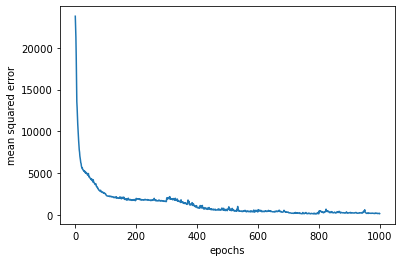

In [108]:
from keras.callbacks import History
history = History()

for n, (tr, te) in enumerate(KFold(n_splits=10, shuffle=True).split(X)):
    print(f'Fold {n+1}')

    model.fit(X[tr],Y.astype(float)[tr],
                validation_data=(X[te], Y.astype(float)[te]),
                epochs=100, batch_size=5, verbose=1, callbacks=[history])
    print('')
    
# Plot the loss history
plt.plot(history.history['loss'])
plt.xlabel("epochs")
plt.ylabel("mean squared error")

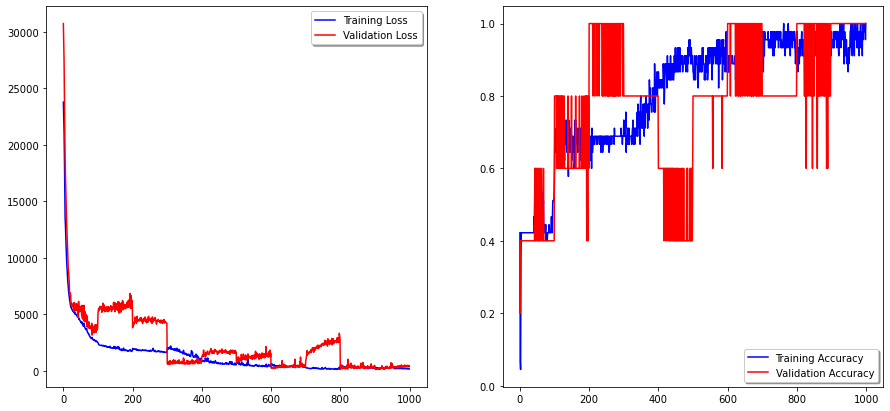

In [110]:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(1,2,1)
ax1.plot(history.history['loss'], color='b', label='Training Loss') 
ax1.plot(history.history['val_loss'], color='r', label = 'Validation Loss',axes=ax1)
legend = ax1.legend(loc='best', shadow=True)
ax2 = plt.subplot(1,2,2)
ax2.plot(history.history['accuracy'], color='b', label='Training Accuracy') 
ax2.plot(history.history['val_accuracy'], color='r', label = 'Validation Accuracy')
legend = ax2.legend(loc='best', shadow=True)

1/1 [==============================] - 0s 92ms/step - loss: 417.9789 - accuracy: 1.0000
[417.9789123535156, 1.0]


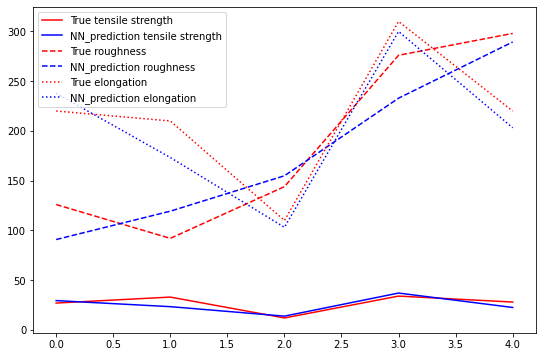

In [111]:
# Evaluate the accuracy of the model (loss: mean squared error, as defined in the step of compiling)
score = model.evaluate(X[te], Y[te], verbose=1)
print(score)

# Batch prediction & plot
Y_pred = model.predict(X[te])

plt.show()
plt.figure(figsize=(9, 6))
line1, = plt.plot(Y[te][:,0],'r-')
line2, = plt.plot(Y_pred[:,0],'b-')
line3, = plt.plot(Y[te][:,1],'r--')
line4, = plt.plot(Y_pred[:,1],'b--')
line5, = plt.plot(Y[te][:,2],'r:')
line6, = plt.plot(Y_pred[:,2],'b:')
plt.legend([line1, line2, line3, line4, line5, line6], ['True tensile strength', 'NN_prediction tensile strength', 'True roughness', 'NN_prediction roughness', 'True elongation', 'NN_prediction elongation'])

In [58]:
Y[te]

array([[ 10.,  68.,  50.],
       [  5.,  92.,  70.],
       [ 10., 220., 100.],
       [ 26.,  88., 160.],
       [ 29.,  74., 200.],
       [ 12., 144., 110.],
       [ 14., 121., 150.],
       [ 22., 172., 230.],
       [  4., 163.,  70.],
       [ 27., 220., 310.]])